In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("OSE_check.txt", sep= "\t")

In [3]:
def revalue(x):
    if x == 0:
        return "Peptidoform not found"
    elif x == 1:
        return "Peptidoform found but PTM not localized/localized differently"
    elif x == 2: 
        return "Peptidoform found and PTM localized on same AA"

In [4]:
data["Found_by_ionbot"] = data["Found_by_ionbot"].apply(revalue)
data["Found_by_MSFragger"] = data["Found_by_MSFragger"].apply(revalue)
data["Found_by_pFind"] = data["Found_by_pFind"].apply(revalue)

In [5]:
data

,Sequence,Site,PTM,Found_by_ionbot,Found_by_MSFragger,Found_by_pFind,Project
0,AQGPAASAEEPkPVEAPAANSDQTVTVKE,K12,Acetyl,Peptidoform not found,Peptidoform found but PTM not localized/locali...,Peptidoform found but PTM not localized/locali...,PXD002516
1,LEEEGQSLkDEMAR,K9,Acetyl,Peptidoform found and PTM localized on same AA,Peptidoform found and PTM localized on same AA,Peptidoform found and PTM localized on same AA,PXD002516
2,kHPEPFFALAK,K1,Acetyl,Peptidoform not found,Peptidoform found but PTM not localized/locali...,Peptidoform found but PTM not localized/locali...,PXD002516
3,GkDSLYAQGR,K2,Acetyl,Peptidoform not found,Peptidoform not found,Peptidoform found but PTM not localized/locali...,PXD002516
4,TkEGVLYVGSK,K2,Acetyl,Peptidoform not found,Peptidoform not found,Peptidoform found but PTM not localized/locali...,PXD002516
...,...,...,...,...,...,...,...
3974,HRHPsLASSGVNGGTQLSILSK,S5,Phospho,Peptidoform not found,Peptidoform found and PTM localized on same AA,Peptidoform not found,PXD004010
3975,GLsQMTTSADTDVDTSKDK,S3,Phospho,Peptidoform found but PTM not localized/locali...,Peptidoform found and PTM localized on same AA,Peptidoform not found,PXD004010
3976,STsMLISSGHNK,S3,Phospho,Peptidoform not found,Peptidoform found and PTM localized on same AA,Peptidoform not found,PXD004010
3977,SWsPPPEVSR,S3,Phospho,Peptidoform not found,Peptidoform found and PTM localized on same AA,Peptidoform not found,PXD004010


goal: stacked bar chart for every diff mod compare OSE (and also total)

Separately for the two projects

x-axis: search engines

y-axis: stacked bar chart of 0 (not found) 1 (found but not localized/localized differently) 2 (found and localized on the same AA)

In [6]:
data = data.groupby(['Project','PTM']).agg({i: 'value_counts' for i in data.columns[3:-1]}).fillna(0).reset_index()

In [7]:
PXD002516 = data[data["Project"] == "PXD002516"]
PXD004010 = data[data["Project"] == "PXD004010"]

In [8]:
data

,Project,PTM,level_2,Found_by_ionbot,Found_by_MSFragger,Found_by_pFind
0,PXD002516,Acetyl,Peptidoform not found,153,40.0,41.0
1,PXD002516,Acetyl,Peptidoform found and PTM localized on same AA,32,79.0,28.0
2,PXD002516,Acetyl,Peptidoform found but PTM not localized/locali...,27,93.0,143.0
3,PXD002516,Deamidated,Peptidoform found and PTM localized on same AA,155,0.0,107.0
4,PXD002516,Deamidated,Peptidoform not found,149,258.0,149.0
5,PXD002516,Deamidated,Peptidoform found but PTM not localized/locali...,82,128.0,130.0
6,PXD002516,HexNAc,Peptidoform not found,3,4.0,4.0
7,PXD002516,HexNAc,Peptidoform found and PTM localized on same AA,1,0.0,0.0
8,PXD002516,Methyl,Peptidoform not found,93,23.0,148.0
9,PXD002516,Methyl,Peptidoform found but PTM not localized/locali...,65,127.0,9.0


subplots: y = 3 , x = 5

In [9]:
df = pd.DataFrame([
    ("PXD002516", "Acetyl","ionbot", 32, 27, 153),
    ("PXD002516", "Acetyl", "MSFragger", 79, 93, 40),
    ("PXD002516", "Acetyl", "pFind", 28, 141, 43),
    ("PXD002516", "Deamidated","ionbot", 155, 82, 149),
    ("PXD002516", "Deamidated", "MSFragger", 0, 128, 258),
    ("PXD002516", "Deamidated","pFind", 107, 130, 149),
    ("PXD002516", "HexNac","ionbot", 1, 0, 3),
    ("PXD002516", "HexNac","MSFragger", 0,0,4),
    ("PXD002516", "HexNac","pFind", 0,0,4),
    ("PXD002516", "Methyl","ionbot", 8,65,93),
    ("PXD002516", "Methyl","MSFragger", 16,127,23),
    ("PXD002516", "Methyl","pFind", 9,9,148),
    ("PXD002516", "Phospho","ionbot", 109,117,119),
    ("PXD002516", "Phospho","MSFragger", 109,72,164),
    ("PXD002516", "Phospho", "pFind", 120,6,219),
    ("PXD004010", "Acetyl","ionbot", 29,3,38),
    ("PXD004010", "Acetyl","MSFragger", 37,4,29),
    ("PXD004010", "Acetyl","pFind", 10,3,57),
    ("PXD004010", "Deamidated","ionbot", 227,181,772),
    ("PXD004010", "Deamidated","MSFragger", 0,431,749),
    ("PXD004010", "Deamidated","pFind", 227,82,871),
    ("PXD004010", "HexNac","ionbot", 22,16,27),
    ("PXD004010", "HexNac","MSFragger", 0,41,24),
    ("PXD004010", "HexNac","pFind", 7,11,47),
    ("PXD004010", "Methyl","ionbot", 27,448,134),
    ("PXD004010", "Methyl","MSFragger", 128,402,79),
    ("PXD004010", "Methyl","pFind", 65,139,405),
    ("PXD004010", "Phospho","ionbot", 326,218,398),
    ("PXD004010", "Phospho","MSFragger", 713,89,140),
    ("PXD004010", "Phospho","pFind", 252,9,681),], columns=["Project","PTM", "Search_engine","Found", "Found_not_localized", "Not_found"])

In [10]:
PXD002516 = df[df["Project"] == "PXD002516"]
PXD004010 = df[df["Project"] == "PXD004010"]

In [11]:
PXD002516Acetyl = PXD002516[PXD002516["PTM"] == 'Acetyl']
PXD002516HexNac = PXD002516[PXD002516["PTM"] == 'HexNac']
PXD002516Deamidated = PXD002516[PXD002516["PTM"] == 'Deamidated']
PXD002516Methyl = PXD002516[PXD002516["PTM"] == 'Methyl']
PXD002516Phospho = PXD002516[PXD002516["PTM"] == 'Phospho']
PXD004010Acetyl = PXD004010[PXD004010["PTM"] == "Acetyl"]
PXD004010HexNac = PXD004010[PXD004010["PTM"] == "HexNac"]
PXD004010Deamidated = PXD004010[PXD004010["PTM"] == "Deamidated"]
PXD004010Methyl = PXD004010[PXD004010["PTM"] == "Methyl"]
PXD004010Phospho = PXD004010[PXD004010["PTM"] == "Phospho"]

In [12]:
PXD002516Acetyl = PXD002516Acetyl.set_index(["PTM"])
PXD002516HexNac = PXD002516HexNac.set_index(["PTM"])
PXD002516Deamidated = PXD002516Deamidated.set_index(["PTM"])
PXD002516Methyl = PXD002516Methyl.set_index(["PTM"])
PXD002516Phospho = PXD002516Phospho.set_index(["PTM"])
PXD004010Acetyl = PXD004010Acetyl.set_index(["PTM"])
PXD004010HexNac = PXD004010HexNac.set_index(["PTM"])
PXD004010Deamidated = PXD004010Deamidated.set_index(["PTM"])
PXD004010Methyl = PXD004010Methyl.set_index(["PTM"])
PXD004010Phospho = PXD004010Phospho.set_index(["PTM"])

In [13]:
combined = df.groupby(["PTM","Search_engine"]).sum().reset_index()
combined = combined.reindex([1,0,2,4,3,5,7,6,8,10,9,11,13,12,14])


In [14]:
combined

,PTM,Search_engine,Found,Found_not_localized,Not_found
1,Acetyl,ionbot,61,30,191
0,Acetyl,MSFragger,116,97,69
2,Acetyl,pFind,38,144,100
4,Deamidated,ionbot,382,263,921
3,Deamidated,MSFragger,0,559,1007
5,Deamidated,pFind,334,212,1020
7,HexNac,ionbot,23,16,30
6,HexNac,MSFragger,0,41,28
8,HexNac,pFind,7,11,51
10,Methyl,ionbot,35,513,227


In [15]:
combinedAcetyl = combined[combined["PTM"]=="Acetyl"]
combinedDeamidated = combined[combined["PTM"] == "Deamidated"]
combinedHexNac = combined[combined["PTM"]=="HexNac"]
combinedMethyl = combined[combined["PTM"]=="Methyl"]
combinedPhospho = combined[combined["PTM"]=="Phospho"]
combinedAcetyl = combinedAcetyl.set_index(["PTM"])
combinedDeamidated = combinedDeamidated.set_index(["PTM"])
combinedHexNac = combinedHexNac.set_index(["PTM"])
combinedMethyl = combinedMethyl.set_index(["PTM"])
combinedPhospho = combinedPhospho.set_index(["PTM"])

In [16]:
allmods = df.groupby(["Project", "Search_engine"]).sum().reset_index()

In [17]:
allmods = allmods.reindex([1,0,2,4,3,5])

In [18]:
allmods002516 = allmods[allmods["Project"] == "PXD002516"]
allmods004010 = allmods[allmods["Project"] == "PXD004010"]

In [19]:
allmods002516

,Project,Search_engine,Found,Found_not_localized,Not_found
1,PXD002516,ionbot,305,291,517
0,PXD002516,MSFragger,204,420,489
2,PXD002516,pFind,264,286,563


In [20]:
allmodscombined = allmods.groupby("Search_engine").sum().reset_index()
allmodscombined = allmodscombined.reindex([1,0,2])

In [21]:
allmodscombined

,Search_engine,Found,Found_not_localized,Not_found
1,ionbot,936,1157,1886
0,MSFragger,1082,1387,1510
2,pFind,825,530,2624


In [22]:
def create_subtitle(fig: plt.Figure, grid: plt.SubplotSpec, title: str):
    "Sign sets of subplots with title"
    row = fig.add_subplot(grid)
    # the '\n' is important
    row.set_title(f'{title}\n', fontweight='semibold')
    # hide subplot
    row.set_frame_on(False)
    row.axis('off')


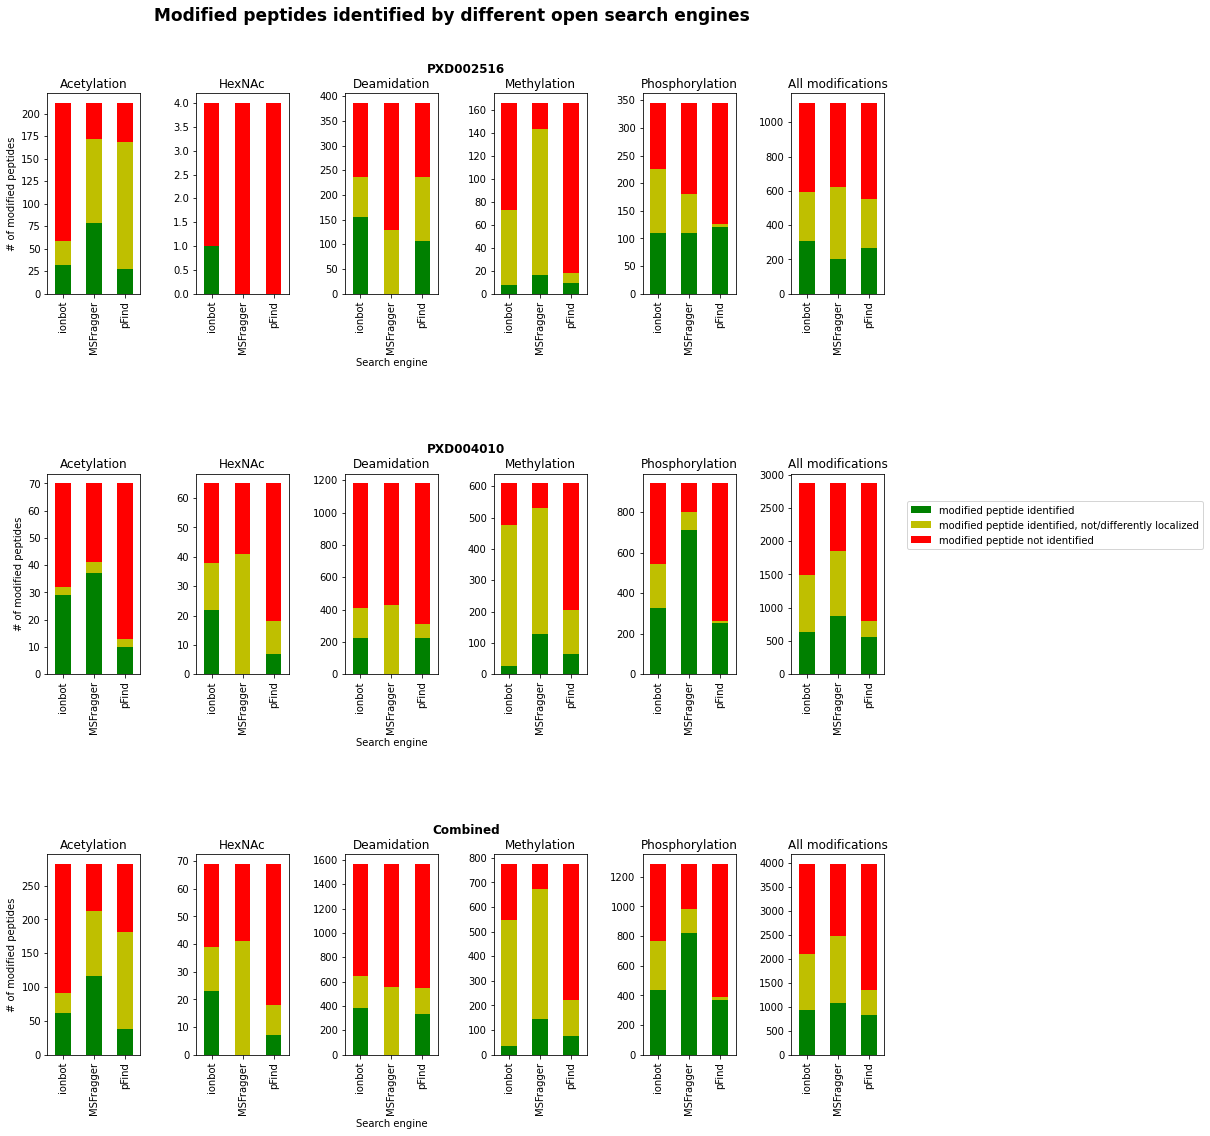

In [23]:
fig, axes = plt.subplots(3,6, sharey=False, sharex=False)
fig.suptitle("Modified peptides identified by different open search engines", fontweight="bold", fontsize=17)
fig.subplots_adjust(top=0.9, bottom=0.01, hspace=0.9, wspace=0.6)
fig.set_size_inches(15,15)

axes[0,0].title.set_text("Acetylation")
PXD002516Acetyl.plot(ax=axes[0,0],x="Search_engine", y=["Found","Found_not_localized", "Not_found"], kind="bar", stacked=True, color=["green","y","red"],legend=0, ylabel="# of modified peptides", xlabel ="")
axes[0,1].title.set_text("HexNAc")
PXD002516HexNac.plot(ax=axes[0,1],x="Search_engine", y=["Found","Found_not_localized", "Not_found"], kind="bar", stacked=True, color=["green","y","red"],legend=0, xlabel="")
axes[0,2].title.set_text("Deamidation")
PXD002516Deamidated.plot(ax=axes[0,2], x="Search_engine", y=["Found","Found_not_localized", "Not_found"], kind="bar", stacked=True, color=["green","y","red"],legend=0, xlabel="Search engine")
axes[0,3].title.set_text("Methylation")
PXD002516Methyl.plot(ax=axes[0,3],x="Search_engine", y=["Found","Found_not_localized", "Not_found"], kind="bar", stacked=True, color=["green","y","red"],legend=0, xlabel="")
axes[0,4].title.set_text("Phosphorylation")
PXD002516Phospho.plot(ax=axes[0,4],x="Search_engine", y=["Found","Found_not_localized", "Not_found"], kind="bar", stacked=True, color=["green","y","red"],legend=0, xlabel="")
axes[0,5].title.set_text("All modifications")
allmods002516.plot(ax=axes[0,5],x="Search_engine", y=["Found","Found_not_localized", "Not_found"], kind="bar", stacked=True, color=["green","y","red"],legend=0, xlabel="")
axes[1,0].title.set_text("Acetylation")
PXD004010Acetyl.plot(ax=axes[1,0], x="Search_engine", y=["Found","Found_not_localized", "Not_found"], kind="bar", stacked=True, color=["green","y","red"],legend=0, ylabel= "# of modified peptides", xlabel= "")
axes[1,1].title.set_text("HexNAc")
PXD004010HexNac.plot(ax=axes[1,1], x="Search_engine", y=["Found","Found_not_localized", "Not_found"], kind="bar", stacked=True, color=["green","y","red"],legend=0, xlabel="")
axes[1,2].title.set_text("Deamidation")
PXD004010Deamidated.plot(ax=axes[1,2], x="Search_engine", y=["Found","Found_not_localized", "Not_found"], kind="bar", stacked=True, color=["green","y","red"],legend=0, xlabel = "Search engine")
axes[1,3].title.set_text("Methylation")
PXD004010Methyl.plot(ax=axes[1,3],x="Search_engine", y=["Found","Found_not_localized", "Not_found"], kind="bar", stacked=True, color=["green","y","red"],legend=0, xlabel= "")
axes[1,4].title.set_text("Phosphorylation")
PXD004010Phospho.plot(ax=axes[1,4],x="Search_engine", y=["Found","Found_not_localized", "Not_found"], kind="bar", stacked=True, color=["green","y","red"],legend=0, xlabel="")
axes[1,5].title.set_text("All modifications")
allmods004010.plot(ax=axes[1,5],x="Search_engine", y=["Found","Found_not_localized", "Not_found"], kind="bar", stacked=True, color=["green","y","red"],legend=0, xlabel="")
axes[2,0].title.set_text("Acetylation")
combinedAcetyl.plot(ax=axes[2,0],x="Search_engine", y=["Found","Found_not_localized", "Not_found"], kind="bar", stacked=True, color=["green","y","red"],legend=0, xlabel="", ylabel="# of modified peptides")
axes[2,1].title.set_text("HexNAc")
combinedHexNac.plot(ax=axes[2,1],x="Search_engine", y=["Found","Found_not_localized", "Not_found"], kind="bar", stacked=True, color=["green","y","red"],legend=0, xlabel="")
axes[2,2].title.set_text("Deamidation")
combinedDeamidated.plot(ax=axes[2,2],x="Search_engine", y=["Found","Found_not_localized", "Not_found"], kind="bar", stacked=True, color=["green","y","red"],legend=0, xlabel="Search engine")
axes[2,3].title.set_text("Methylation")
combinedMethyl.plot(ax=axes[2,3],x="Search_engine", y=["Found","Found_not_localized", "Not_found"], kind="bar", stacked=True, color=["green","y","red"],legend=0, xlabel="")
axes[2,4].title.set_text("Phosphorylation")
combinedPhospho.plot(ax=axes[2,4],x="Search_engine", y=["Found","Found_not_localized", "Not_found"], kind="bar", stacked=True, color=["green","y","red"],legend=0, xlabel="")
axes[2,5].title.set_text("All modifications")
allmodscombined.plot(ax=axes[2,5],x="Search_engine", y=["Found","Found_not_localized", "Not_found"], kind="bar", stacked=True, color=["green","y","red"],legend=0, xlabel="")
handles, labels = axes[2,5].get_legend_handles_labels()
fig.legend(handles, ["modified peptide identified", "modified peptide identified, not/differently localized", "modified peptide not identified"], loc="center right", fontsize=10, bbox_to_anchor=(1.2,0.5))
grid = plt.GridSpec(3,5)

create_subtitle(fig, grid[0,::], 'PXD002516')
create_subtitle(fig, grid[1,::], "PXD004010")
create_subtitle(fig, grid[2,::], "Combined")
plt.show()